In [85]:
import numpy as np
import pandas as pd

## Data Pre-Processing

In [86]:
#import dataset as dataframe
df = pd.read_csv('churn.csv')
#check for missing values
df.isnull().any()


customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [87]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Balancing the Dataset
We will use undersampling to balance out the dataset

In [88]:
# check the number of entries belonging to each class
total_yes = df[df['Churn']=='Yes'].shape[0]
total_no = df[df['Churn']=='No'].shape[0]

print (f'Total Yes: {total_yes}\nTotal No: {total_no} ')

Total Yes: 1869
Total No: 5174 


In [89]:
## split dataset accoring to classes
df_yes = df[df['Churn']=='Yes']
df_no = df[df['Churn']=='No']

#select 1869 random entries from df_no
df_no = df_no.sample(n=1869)

#merge df_yes and df_no
df = pd.concat([df_yes, df_no])

In [90]:
#drop irrelevant column
df.drop (columns=['customerID'], inplace=True)

#change target labels to numeric values
df['Churn'] = df['Churn'].map ({'Yes': 1, 'No': 0}) 

In [91]:
percentage_churn_0 = (df['Churn'] == 0).mean() * 100
print(f"Percentage of samples where Churn is 0: {percentage_churn_0:.2f}%")


Percentage of samples where Churn is 0: 50.00%


In [92]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [93]:
#apply one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=[
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
])


In [94]:
# TotalCharges has dtype 'obj' and includes empty strings as values
# we will convert it to a numeric datatype and use errors='coerce' to convert empty strnigs to NaN
df['TotalCharges'] = pd.to_numeric (df['TotalCharges'], errors='coerce')

In [95]:
#check for missing values
df['TotalCharges'].isnull().sum()

4

In [96]:
# drop rows with NaN values
df = df.dropna(subset=['TotalCharges'])

In [97]:
#convert all values to float32
for col in df.columns:
    df[col] = df[col].astype(np.float32)

In [98]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2,0.0,2.0,53.849998,108.150002,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,2.0,70.699997,151.649994,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.0,8.0,99.650002,820.500000,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.0,28.0,104.800003,3046.050049,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13,0.0,49.0,103.699997,5036.299805,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [99]:
# Split data into input and target sets
X = df.drop('Churn', axis=1)
y = df['Churn']

# split data further into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=1)

In [100]:
#Normalisation of continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Fit the scaler on the training data
X_train[columns] = scaler.fit_transform(X_train[columns])

# Transform the test data
X_test[columns] = scaler.transform(X_test[columns])




In [101]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


## Building Our Models

In [102]:
from keras import models, layers, optimizers, losses, metrics

In [103]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Function to Get Average Cross-Validated Accuracy Scores
The following function performs k-fold cross validation. For each fold, it trains the model for a certain number of epochs and records the validation accuracies for each epoch. It then returns the average accuracies by epoch over all splits

In [104]:
def val_accuracies (model, n_folds, n_epochs, X, y):

    #create K-fold object
    fold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1)
    
    #list to store all validation losses
    val_acc_histories = []
    
    for train_index, val_index in fold.split (X, y):
        train_x, train_y = X[train_index], y[train_index]
        val_x, val_y = X[val_index], y[val_index]
        
        #fit model to training data
        history = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=n_epochs, batch_size=1, verbose=0)

        #get validation loss for each epoch
        val_acc_history = history.history['val_accuracy']
        #store this in histories
        val_acc_histories.append(val_acc_history)
    
    #compute average of validation loss at each epoch across all folds
    avg_val_acc = [np.mean([x[i] for x in val_acc_histories]) for i in range(n_epochs)]
    
    return avg_val_acc
    

### Model 1
Simple model with one hidden layer of 8 units

In [105]:
#define input size
input_size = X_train.shape[1]

In [107]:
model_1 = models.Sequential()
model_1.add(layers.Dense(8, activation='relu', input_shape=(input_size,)))
model_1.add(layers.Dense(1, activation='sigmoid'))

model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [108]:
# get cross validated scores
avg_acc_1 = val_accuracies (model_1, 4, 10, X_train, y_train)

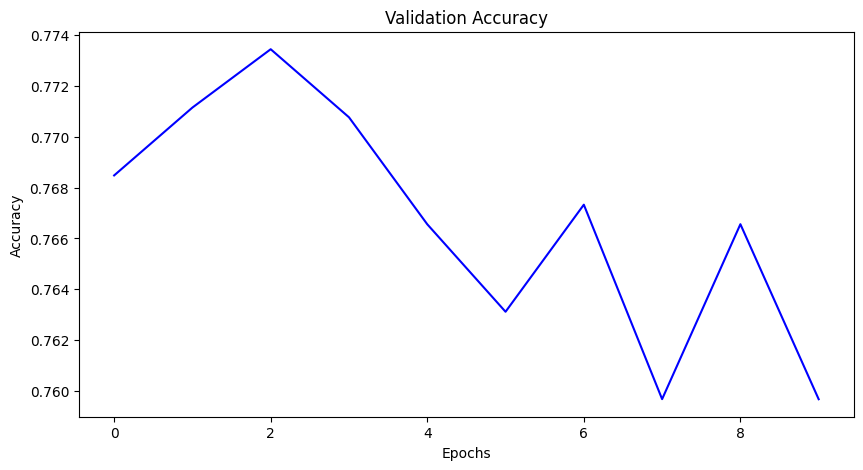

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot ([i for i in range (len(avg_acc_1))], avg_acc_1, 'b-', label=['Validation Accuracy'])
plt.title ('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')



plt.show()

### Model 2
Additional layer of 4 units

In [111]:
model_2 = models.Sequential()
model_2.add(layers.Dense(8, input_dim=input_size, activation='relu'))
model_2.add(layers.Dense(4, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [112]:
avg_acc_2 = val_accuracies (model_2, 4, 10, X_train, y_train)

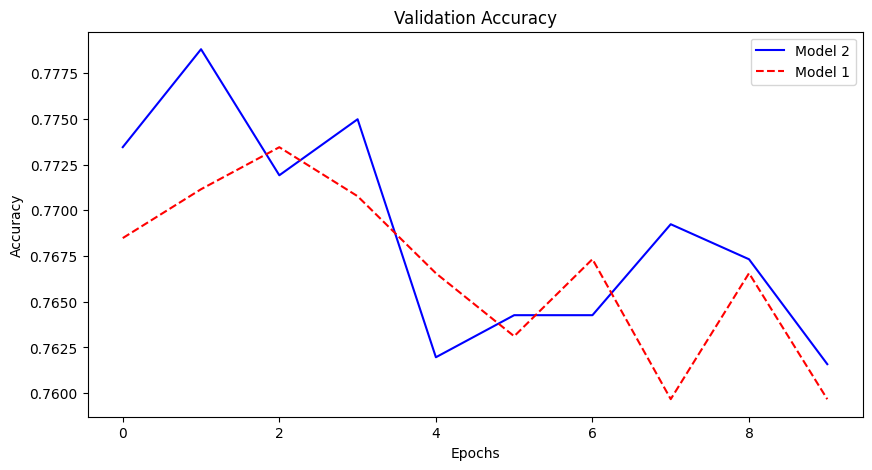

In [113]:
plt.figure(figsize=(10, 5))

plt.plot ([i for i in range (len(avg_acc_2))], avg_acc_2, 'b-', label='Model 2')
plt.plot ([i for i in range (len(avg_acc_1))], avg_acc_1, 'r--', label='Model 1')
plt.title ('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


plt.legend()
plt.show()

#### No conclusive improvement in performance over Model 1

### Model 3
Increasing nodes to 32 and 16

In [115]:
model_3 = models.Sequential()
model_3.add(layers.Dense(32, input_dim=input_size, activation='relu'))
model_2.add(layers.Dense(16, activation='relu'))
model_3.add(layers.Dense(1, activation='sigmoid'))

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [116]:
avg_acc_3 = val_accuracies (model_3, 4, 10, X_train, y_train)

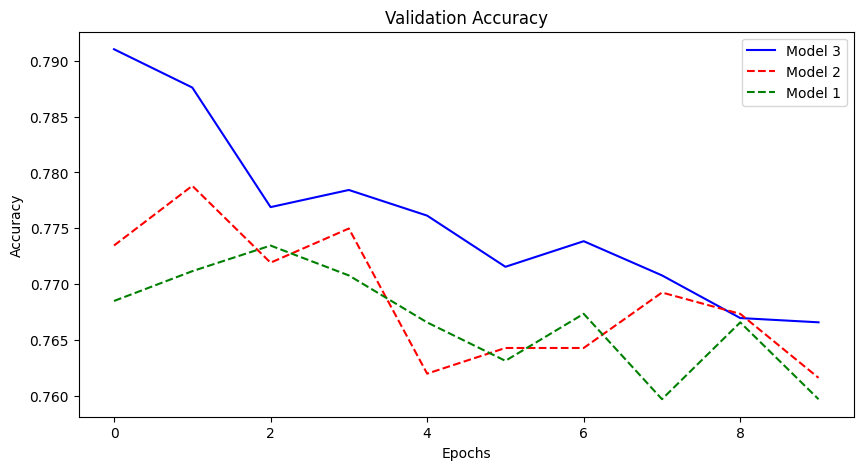

In [127]:
plt.figure(figsize=(10, 5))

plt.plot ([i for i in range (len(avg_acc_3))], avg_acc_3, 'b-', label='Model 3')
plt.plot ([i for i in range (len(avg_acc_2))], avg_acc_2, 'r--', label='Model 2')
plt.plot ([i for i in range (len(avg_acc_1))], avg_acc_1, 'g--', label='Model 1')
plt.title ('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


plt.legend()
plt.show()

#### Model 3 shows a slight improvement over the previous two models

### Model 4
Increasing the number of nodes to 64 and 32 respectively

In [119]:
model_4 = models.Sequential()
model_4.add(layers.Dense(64, input_shape=(input_size,), activation='relu'))
model_4.add(layers.Dense(32, activation='relu'))
model_4.add(layers.Dense(1, activation='sigmoid'))

model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [120]:
avg_acc_4 = val_accuracies (model_4, 4, 10, X_train, y_train)

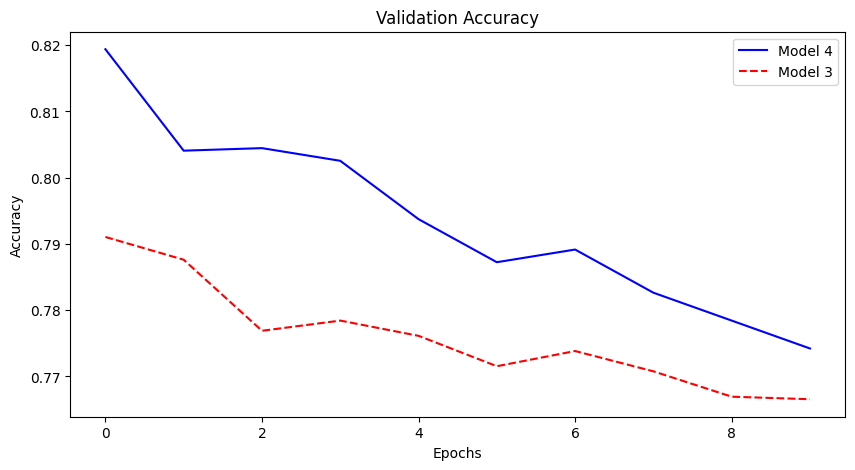

In [54]:
plt.figure(figsize=(10, 5))

plt.plot ([i for i in range (len(avg_acc_4))], avg_acc_4, 'b-', label='Model 4')
plt.plot ([i for i in range (len(avg_acc_3))], avg_acc_3, 'r--', label='Model 3')
plt.title ('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

#### Model 4 shows improved accuracy compared to Model 3

### Model 5
Increasing units to 128 and 64

In [130]:
model_5 = models.Sequential()
model_5.add(layers.Dense(128, input_shape=(input_size,), activation='relu'))
model_5.add(layers.Dense(64, activation='relu'))
model_5.add(layers.Dense(1, activation='sigmoid'))

model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [139]:
avg_acc_5 = val_accuracies (model_5, 4, 10, X_train, y_train)

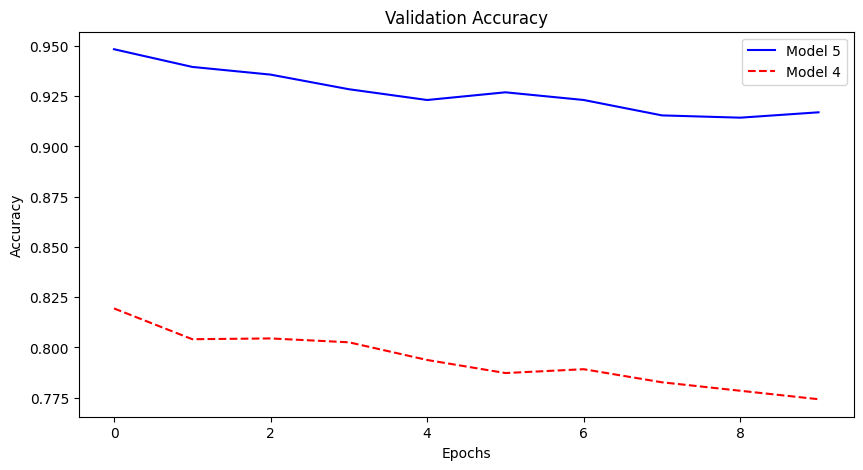

In [140]:
plt.figure(figsize=(10, 5))

plt.plot ([i for i in range (len(avg_acc_5))], avg_acc_5, 'b-', label='Model 5')
plt.plot ([i for i in range (len(avg_acc_4))], avg_acc_4, 'r--', label='Model 4')
plt.title ('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

#### Model 5 shows a reamrkable improvement in validation accuracies. We will stick with this model

### Adding Dropout and Regularization to Model 5
We will now make our selected model, Model 5, more robust by adding dropout and l2 regularisation

In [134]:
from keras.regularizers import l2

In [136]:
model_reg = models.Sequential()
model_reg.add(layers.Dense(128, input_shape=(input_size,), activation='relu', kernel_regularizer=l2(0.0001)))
model_reg.add(layers.Dropout(0.1))
model_reg.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.0001)))
model_reg.add(layers.Dropout(0.1))
model_reg.add(layers.Dense(1, activation='sigmoid'))

model_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [137]:
avg_acc_reg = val_accuracies (model_reg, 4, 10, X_train, y_train)

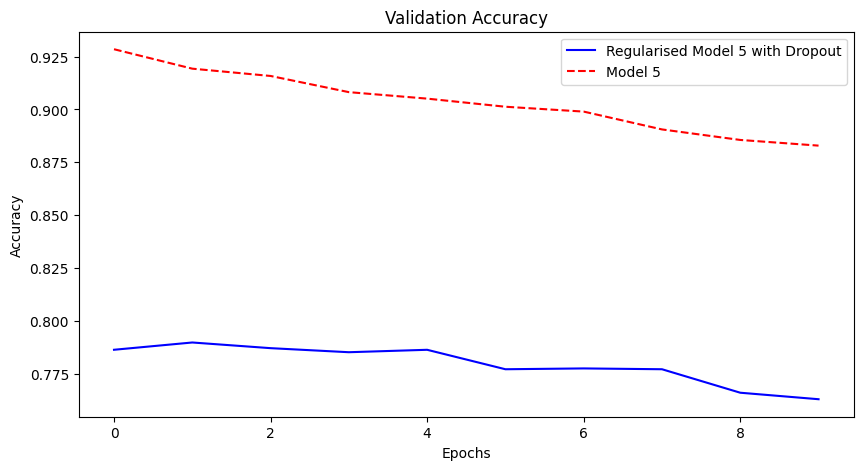

In [138]:
plt.figure(figsize=(10, 5))

plt.plot ([i for i in range (len(avg_acc_reg))], avg_acc_reg, 'b-', label='Regularised Model 5 with Dropout')
plt.plot ([i for i in range (len(avg_acc_5))], avg_acc_5, 'r--', label='Model 5')
plt.title ('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

#### Regularisation and dropout, even with small values, tend to decrease performance

### Fitting our Final Model and Evaluating on Test Data


In [143]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model_5.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping], verbose=0)

# Predict on test data
y_pred = (model_5.predict(X_test) > 0.5).astype("int32")


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step


In [145]:
# Evaluate performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

Precision: 0.7028380634390651
Recall: 0.7271157167530224
Accuracy: 0.7002676181980375


#### Comparing model performance to a Naive Bayes Mode

In [147]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Create the model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.735950044603033
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.62      0.69       542
         1.0       0.70      0.84      0.77       579

    accuracy                           0.74      1121
   macro avg       0.75      0.73      0.73      1121
weighted avg       0.74      0.74      0.73      1121

